In [1]:
import open3d as o3d
import os

def compare_meshes(paths, colors):
    meshes = []
    for p, c in zip(paths, colors):
        m = o3d.io.read_triangle_mesh(p)
        m.compute_vertex_normals()
        m.paint_uniform_color(c)
        meshes.append(m)
    o3d.visualization.draw_geometries(meshes)

# compare_meshes(
#     ["meshes/girl.obj",
#      "outputs/girl_normalized_unitsphere.obj",
#      "outputs/girl_reconstructed_unitsphere.obj"],
#     [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
# )

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
mesh_names = ["branch", "cylinder", "explosive", "fence", "girl", "person", "table", "talwar"]

for name in mesh_names:
    orig_path = os.path.join("meshes", f"{name}.obj")
    recon_path = os.path.join("outputs", f"{name}_reconstructed_minmax.obj")  # or _unitsphere.obj if you prefer
    
    print(f"\n🧩 Comparing: {name}")
    compare_meshes(
        [orig_path, recon_path],
        [[1, 0, 0], [0, 1, 0]]  # Red = Original, Green = Reconstructed
    )


🧩 Comparing: branch
[Open3D INFO] Skipping non-triangle primitive geometry of type: 8

🧩 Comparing: cylinder

🧩 Comparing: explosive

🧩 Comparing: fence

🧩 Comparing: girl

🧩 Comparing: person
[Open3D INFO] Skipping non-triangle primitive geometry of type: 8

🧩 Comparing: table

🧩 Comparing: talwar


In [3]:
import trimesh
import numpy as np

# Load your mesh
mesh = trimesh.load("meshes/branch.obj", process=False)

# Original vertex array
V_orig = np.array(mesh.vertices)

print("Original Vertices Shape:", V_orig.shape)
print("Min:", V_orig.min(axis=0))
print("Max:", V_orig.max(axis=0))
print("Mean:", V_orig.mean(axis=0))


Original Vertices Shape: (2767, 3)
Min: [-0.851562  0.       -0.464844]
Max: [0.849609 1.900391 0.462891]
Mean: [0.0754427  1.0873903  0.12196689]


In [4]:
def minmax_normalize(V):
    vmin, vmax = V.min(axis=0), V.max(axis=0)
    span = np.where((vmax - vmin) == 0, 1.0, (vmax - vmin))
    Vn = (V - vmin) / span
    ctx = {"vmin": vmin, "vmax": vmax}
    return Vn, ctx
def minmax_denormalize(V_norm, ctx):
    vmin, vmax = ctx["vmin"], ctx["vmax"]
    return V_norm * (vmax - vmin) + vmin

V_norm, ctx = minmax_normalize(V_orig)
V_denorm = minmax_denormalize(V_norm, ctx)

print("Normalized Vertices Range (Min–Max):")
print("Min:", V_norm.min(axis=0))
print("Max:", V_norm.max(axis=0))
print("Mean:", V_norm.mean(axis=0))




Normalized Vertices Range (Min–Max):
Min: [0. 0. 0.]
Max: [1. 1. 1.]
Mean: [0.54492153 0.57219293 0.63251994]


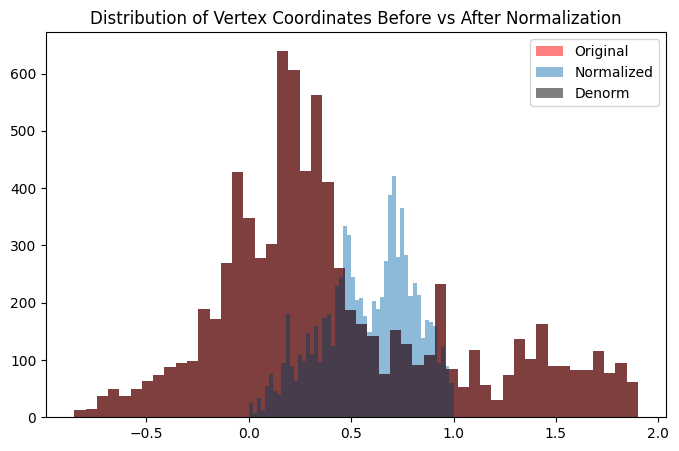

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(V_orig.flatten(), bins=50, alpha=0.5, label='Original', color="red")
plt.hist(V_norm.flatten(), bins=50, alpha=0.5, label='Normalized')
plt.hist(V_denorm.flatten(), bins=50, alpha=0.5, label="Denorm", color="#000")
plt.legend()
plt.title("Distribution of Vertex Coordinates Before vs After Normalization")
plt.show()